<a href="https://colab.research.google.com/github/ARramji/Python_Practice-/blob/main/Python_NFL_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A Python coding exercise to demonstrate that long passes in the NFL are more
# valuable than short passes, but using deep pass production as an evaluation
# technique is not smart.
# To do this, I will show that long passes are more valuable than short passes.
# Then, I will demonstrate that performance on deep passes is unstable and not
# predictive of future performance.



In [3]:
!pip install nfl_data_py
!pip install pandas
!pip install os
!pip install matplotlib
!pip install numpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.8 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=1cbbe444b21f5e7c68ec5d47d9fc57e7451791522887282516b2b6ed4839d2cc
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [4]:
# Importing data
import pandas as pd
import numpy as np
import nfl_data_py as nfl


In [5]:
# Loading and importing specific NFL seasons
seasons = range(2016, 2022 +1)
pbp_py = nfl.import_pbp_data(seasons)


2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [6]:
# Filtering out run plays, throw aways and penalties
pbp_py_p = \
    pbp_py\
    .query("play_type == 'pass' & air_yards.notnull()")\
    .reset_index()

In [7]:
# Sorting pass plays into long and short
pbp_py_p["pass_length_air_yards"] = np.where(pbp_py_p["air_yards"] >= 20, "long", "short")



In [8]:
# Replace missing values
pbp_py_p["passing_yards"] = np.where(
      pbp_py_p["passing_yards"].isnull(), 0, pbp_py_p["passing_yards"]
)


In [9]:
# Short passes EPA (Expected Points Added)
pbp_py_p\
  .query('pass_length_air_yards == "short"')["epa"].describe()

count    116084.000000
mean          0.119577
std           1.426167
min         -13.031219
25%          -0.606107
50%          -0.002116
75%           0.959070
max           8.241420
Name: epa, dtype: float64

In [10]:
# Long passes EPA
pbp_py_p.query('pass_length_air_yards == "long"')["epa"].describe()

count    15521.000000
mean         0.382539
std          2.186034
min        -10.477921
25%         -0.827517
50%         -0.465127
75%          2.136195
max          8.789743
Name: epa, dtype: float64

In [ ]:
# Conclusions:
# EPA per attempt is higher for long passes than short passes.
# Therefore, our basic assumption that deep passes are more valuable than short
# passes has been informally confirmed.




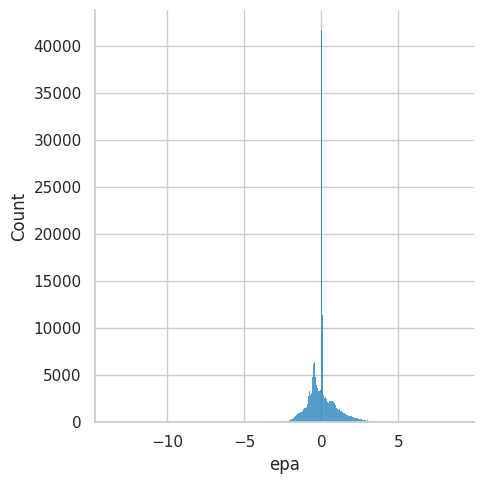

In [ ]:
# Next step: Plot data to see if:
# - Data looks okay
# - Any outliers
# - Trends emerge


# Import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

# plot first histogram
sns.displot(data=pbp_py, x ="epa");
plt.show();


In [ ]:
# Most pass plays add zero value to a teams win probablity

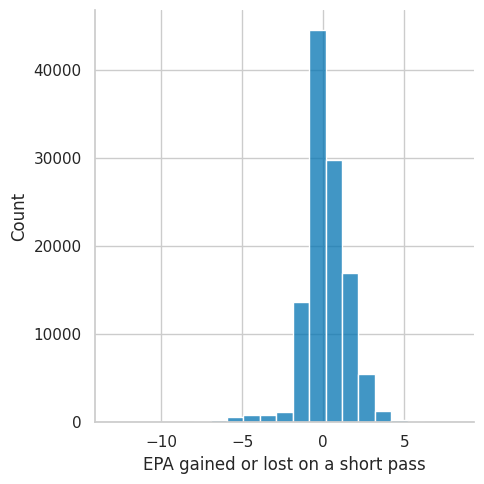

In [ ]:
# Create histogram for short passes
# Format histogram
sns.set_theme(style="whitegrid", palette="colorblind")

# Filter out long passes
pbp_py_p_short = \
  pbp_py_p.query('pass_length_air_yards == "short"')

# Set axis names
pbp_py_p_short = \
  sns.displot(data=pbp_py_p_short,
              binwidth=1,
              x="epa")

pbp_py_p_short.set_axis_labels(
    "EPA gained or lost on a short pass")
plt.show()

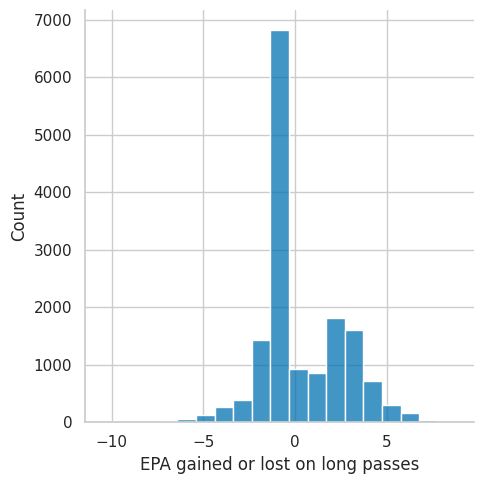

In [ ]:
# Same as above with filtering out short passes
sns.set_theme(style="whitegrid", palette="colorblind")

pbp_py_p_short = \
  pbp_py_p.query('pass_length_air_yards == "long"')

pbp_py_p_short = \
  sns.displot(data=pbp_py_p_short,
              binwidth=1,
              x="epa")

pbp_py_p_short.set_axis_labels(
    "EPA gained or lost on long passes" )
plt.show()

In [ ]:
# Shorter passing plays have much less variance then longer passing plays

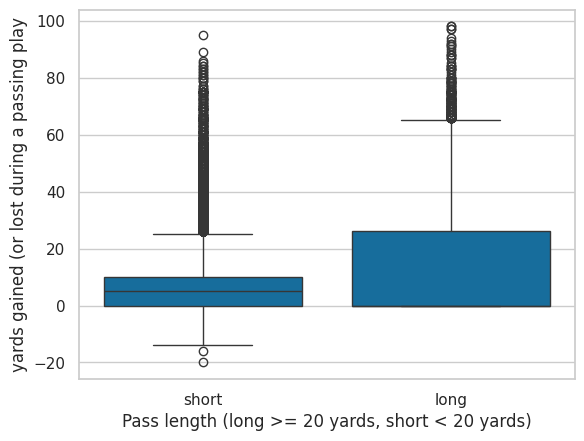

In [ ]:
# Box plot representation of yards per attempt
pass_boxplot = \
  sns.boxplot(data=pbp_py_p,
              x="pass_length_air_yards",
              y="passing_yards");
pass_boxplot.set(
    xlabel="Pass length (long >= 20 yards, short < 20 yards)",
    ylabel="yards gained (or lost during a passing play"
);
plt.show();

In [11]:
# Group and aggregate data
pbp_py_p_s = \
  pbp_py_p\
  .groupby(["passer_id", "passer", "season"])\
  .agg({"epa" : ["mean", "count"]})

# collapse columns and loop over items
pbp_py_p_s.columns = list(map("_".join, pbp_py_p_s.columns.values))

# Rename columns
pbp_py_p_s\
  .rename(columns ={'epa_mean': 'epa',
                    'epa_count': 'n'},
          inplace=True )

# Sorting data
pbp_py_p_s.sort_values(by=["epa"], ascending=False)\
.head()

# removing small samples
pbp_py_p_s_100 = \
  pbp_py_p_s\
  .query("n >= 100")\
  .sort_values(by=["epa"], ascending=False)


# Display the first five rows of the DataFrame
pbp_py_p_s_100.head()

,,,epa,n
passer_id,passer,season,,
00-0026143,M.Ryan,2016,0.480326,631
00-0033873,P.Mahomes,2018,0.422636,651
00-0031345,J.Garoppolo,2017,0.401736,176
00-0023459,A.Rodgers,2020,0.387941,607
00-0029701,R.Tannehill,2019,0.383158,343


In [12]:
# Group and aggregate data
pbp_py_p_s_pl = \
  pbp_py_p\
  .groupby(["passer_id", "passer", "season","pass_length_air_yards"])\
  .agg({"epa": ["mean", "count"]})

# Flatten columns and change names
pbp_py_p_s_pl.columns =\
  list(map("_".join, pbp_py_p_s_pl.columns.values))
pbp_py_p_s_pl\
  .rename(columns={'epa_mean': 'epa',
                   'epa_count':'n'},
          inplace=True)

# Reset the index
pbp_py_p_s_pl.reset_index(inplace=True)

# Filter out small samples
q_value = (
    '(n>=100 & ' +
    'pass_length_air_yards == "short") |' +
    '(n>= 30 & ' +
    'pass_length_air_yards == "long")'
)

pbp_py_p_s_pl = pbp_py_p_s_pl.query(q_value).reset_index()

# new data frame
cols_save =\
  ["passer_id", "passer", "season", "pass_length_air_yards", "epa"]
air_yards_py =\
  pbp_py_p_s_pl[cols_save].copy()

# Creating a column for last years air yards
air_yards_lag_py =\
  air_yards_py\
  .copy()
air_yards_lag_py["season"] += 1
air_yards_lag_py\
  .rename(columns={'epa': 'epa_last'},
          inplace=True)

# Merge datasets
pbp_py_p_s_pl =\
  air_yards_py\
  .merge(air_yards_lag_py,
         how = 'inner',
         on = ['passer_id','passer',
               'season','pass_length_air_yards'])

# Print relevant columns
print(
    pbp_py_p_s_pl[["pass_length_air_yards","passer",
                   "season","epa","epa_last"]]\
    .query('passer == "T.Brady" | passer == "A.Rodgers"')\
    .sort_values(["passer", "pass_length_air_yards","season"])\
    .to_string()
)

   pass_length_air_yards     passer  season       epa  epa_last
47                  long  A.Rodgers    2019  0.517768  0.555547
49                  long  A.Rodgers    2020  0.964115  0.517768
51                  long  A.Rodgers    2021  0.664930  0.964115
53                  long  A.Rodgers    2022  0.266201  0.664930
45                 short  A.Rodgers    2017  0.169026  0.283314
46                 short  A.Rodgers    2018  0.175965  0.169026
48                 short  A.Rodgers    2019  0.170840  0.175965
50                 short  A.Rodgers    2020  0.285013  0.170840
52                 short  A.Rodgers    2021  0.262669  0.285013
54                 short  A.Rodgers    2022  0.054327  0.262669
0                   long    T.Brady    2017  0.608399  0.968524
2                   long    T.Brady    2018  0.204391  0.608399
4                   long    T.Brady    2019  0.424035  0.204391
6                   long    T.Brady    2020  0.386993  0.424035
8                   long    T.Brady    2

In [13]:
# Double check the data I have
pbp_py_p_s_pl\
  .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passer_id              317 non-null    object 
 1   passer                 317 non-null    object 
 2   season                 317 non-null    int64  
 3   pass_length_air_yards  317 non-null    object 
 4   epa                    317 non-null    float32
 5   epa_last               317 non-null    float32
dtypes: float32(2), int64(1), object(3)
memory usage: 14.9+ KB


In [14]:
# Check sample size
len(pbp_py_p_s_pl.passer_id.unique())

65

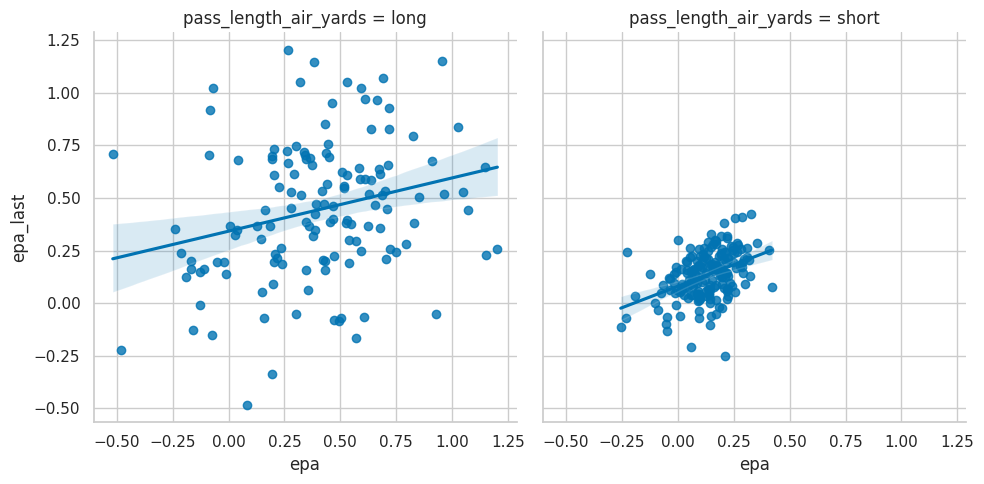

In [ ]:
# Check year to year correlation
sns.lmplot(data=pbp_py_p_s_pl,
           x="epa",
           y="epa_last",
           col="pass_length_air_yards");
plt.show();

In [ ]:
# Key Takeaway: We want QBs to throw deep, but when evaluating QB play, we
# should focus on production on short passes rather than long passes as it is
# stabler and predictive of future performance.

# Idea for future related research:
# Is short passing performance predictive of deep pass performance?
